<a href="https://colab.research.google.com/github/vanshikaprjpt7/Predictive-Modeling-for-Click-Through-Rate-Optimization-at-ConnectSphere-Digital-/blob/main/Edi_MINOR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

# Importing the data file into the notebook!
Choose the data file from your computer! (Saved as
= advertising.csv)

In [4]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving advertising.csv to advertising.csv
{'advertising.csv': b"Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad\n68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0\n80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0\n69.47,26,59785.94,236.5,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0\n74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0\n68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0\n59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0\n88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0\n66.0,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1\n74.

**NOW! Let's load up the data**

In [5]:
df=pd.read_csv('advertising.csv')
df.head()

df.describe()
df.dropna()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


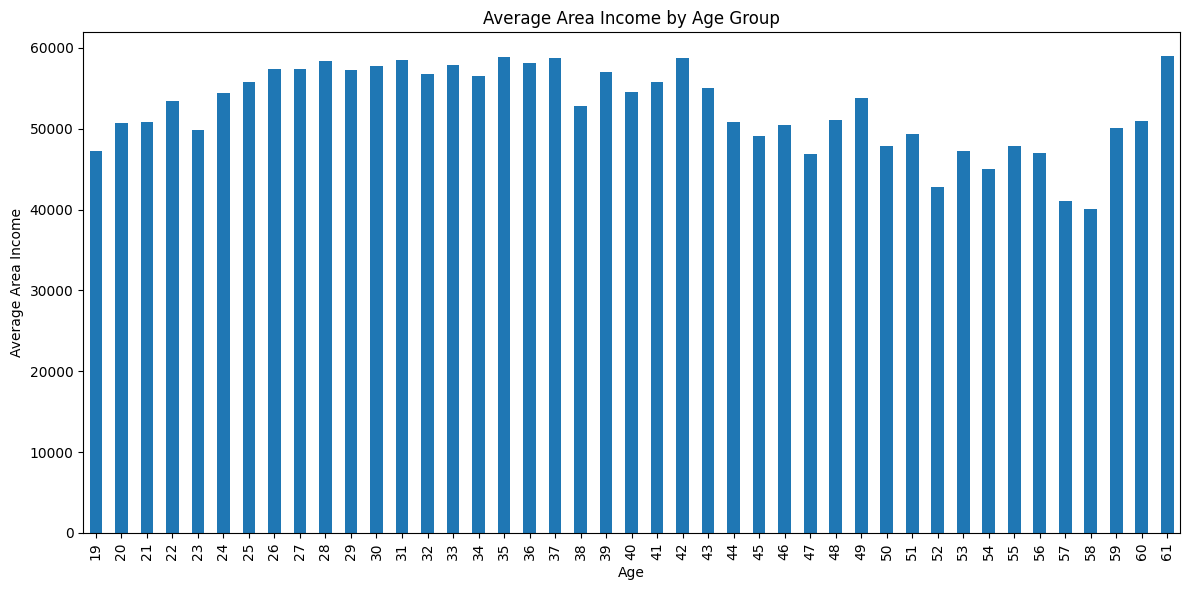

In [6]:
#avg age and income
import matplotlib.pyplot as plt

average_income_by_age = df.groupby('Age')['Area Income'].mean()

plt.figure(figsize=(12, 6))
average_income_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Area Income')
plt.title('Average Area Income by Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Analyze the distribution of key characteristics (like Age, Area Income, Daily Time Spent on Site, Daily Internet Usage, Clicked on Ad) for users in top countries.

,Age,Area Income,Daily Time Spent on Site,Daily Internet Usage,Clicked on Ad
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,37.613445,52783.074538,62.584958,173.231345,0.588235
std,9.325661,13173.302140,16.031380,46.129981,0.494234
min,21.000000,24030.060000,32.910000,106.040000,0.000000
25%,30.000000,43186.705000,50.825000,127.640000,0.000000
50%,37.000000,52079.180000,63.430000,164.830000,1.000000
75%,44.500000,62970.265000,74.930000,212.750000,1.000000
max,60.000000,77871.750000,91.150000,267.010000,1.000000


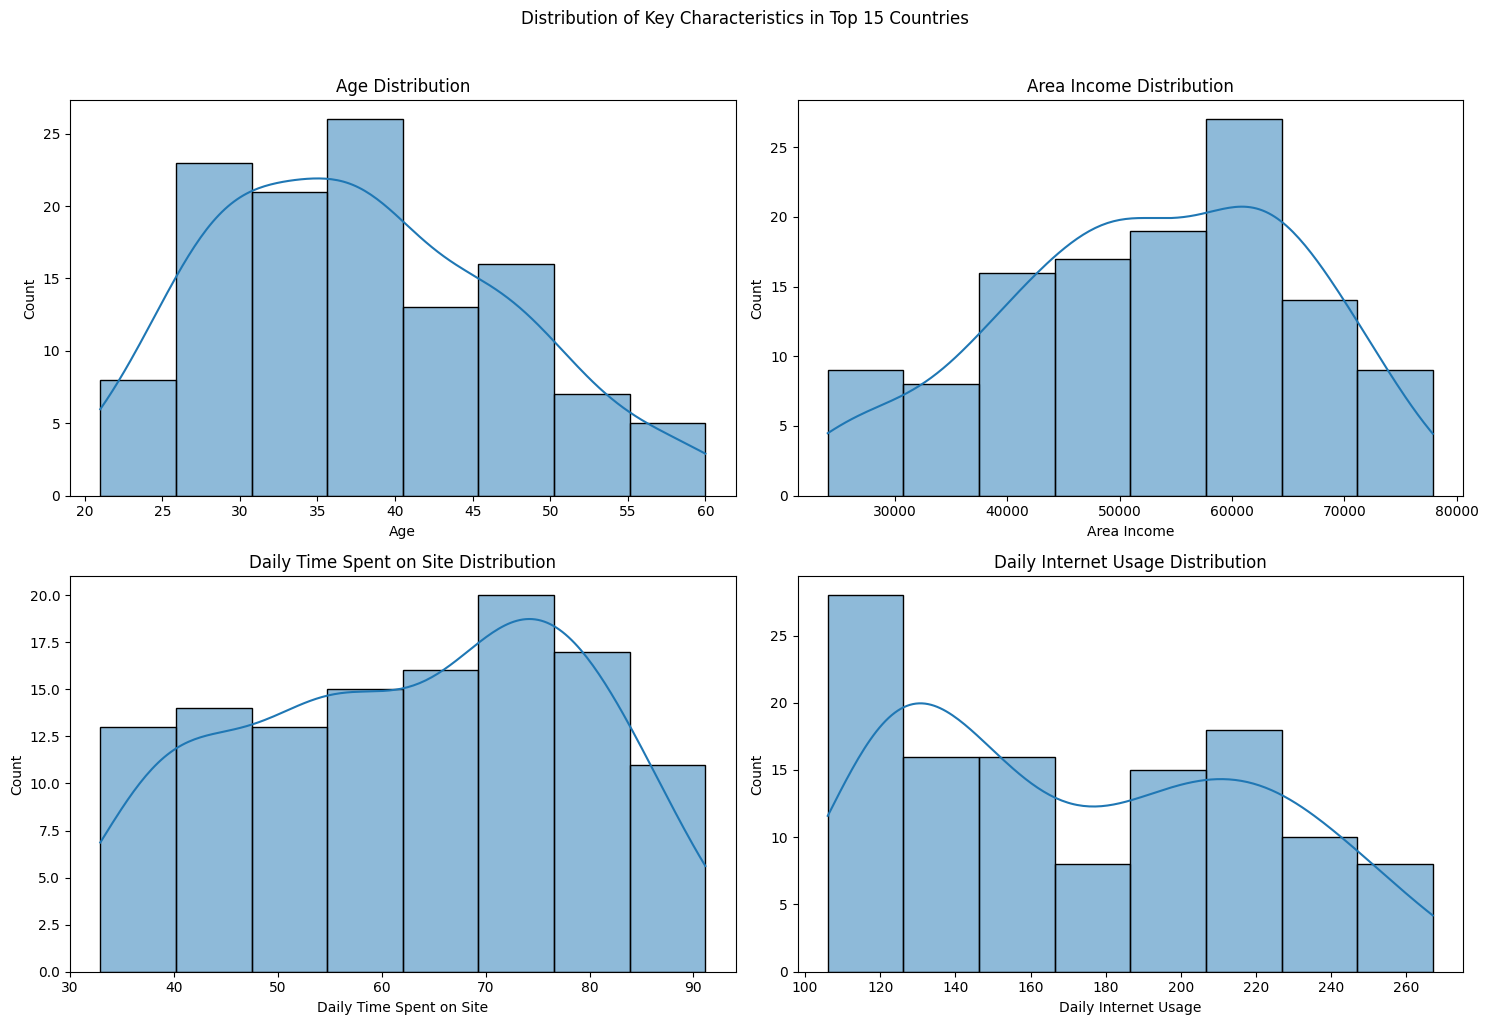

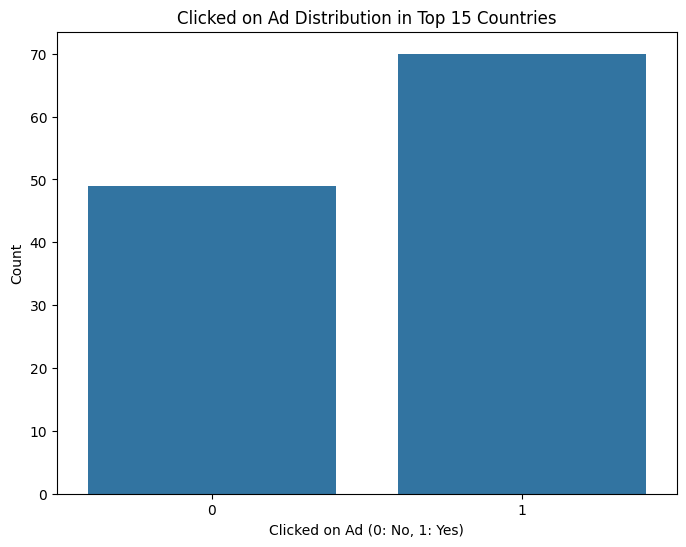

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#top 15 countries by number of entries
country_counts = df['Country'].value_counts()
top_15_countries = country_counts.nlargest(15)


df_top_countries = df[df['Country'].isin(top_15_countries.index)]

display(df_top_countries[['Age', 'Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Clicked on Ad']].describe())
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Characteristics in Top 15 Countries', y=1.02)

sns.histplot(data=df_top_countries, x='Age', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')

sns.histplot(data=df_top_countries, x='Area Income', ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Area Income Distribution')

sns.histplot(data=df_top_countries, x='Daily Time Spent on Site', ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Daily Time Spent on Site Distribution')

sns.histplot(data=df_top_countries, x='Daily Internet Usage', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Daily Internet Usage Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df_top_countries, x='Clicked on Ad')
plt.title('Clicked on Ad Distribution in Top 15 Countries')
plt.xlabel('Clicked on Ad (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

##Calculate click-through rate (ctr) per country

,Clicked on Ad
Country,
Afghanistan,0.625000
Albania,0.571429
Algeria,0.500000
American Samoa,0.600000
Andorra,1.000000


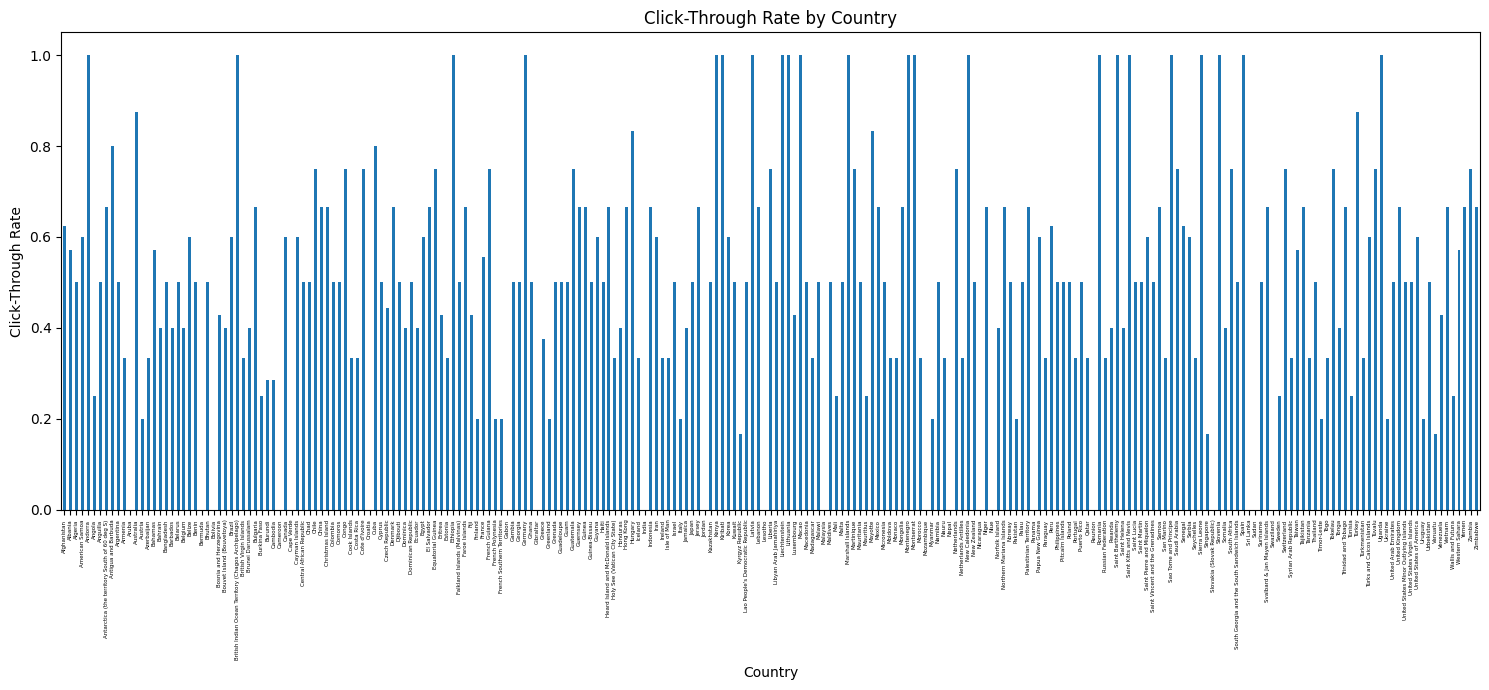

In [9]:
ctr_by_country = df.groupby('Country')['Clicked on Ad'].mean()
display(ctr_by_country.head())

plt.figure(figsize=(15, 7))
ctr_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Click-Through Rate')
plt.title('Click-Through Rate by Country')
plt.xticks(rotation=90, fontsize=4)
plt.tight_layout()
plt.show()

##Interpret the visualization to identify countries with high and low CTRs.


Countries with highest CTR:


['Andorra',
 'British Indian Ocean Territory (Chagos Archipelago)',
 'Ethiopia',
 'Germany',
 'Kenya']


Countries with lowest CTR:


['Aruba', 'Bermuda', 'Bolivia', 'Cameroon', 'Cape Verde']

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
18,54.70,36,31087.54,118.39,Grass-roots solution-oriented conglomeration,Jessicastad,1,British Indian Ocean Territory (Chagos Archipe...,2016-02-13 07:53:55,1
152,37.00,48,36782.38,158.22,Function-based context-sensitive secured line,Jonathantown,1,Kenya,2016-03-24 06:36:52,1
191,60.23,35,43313.73,106.86,Balanced asynchronous hierarchy,New Brendafurt,0,Kenya,2016-03-08 18:00:43,1
378,67.56,31,62318.38,125.45,Seamless composite budgetary management,Michelleside,0,Kenya,2016-04-25 21:15:39,1
454,82.12,52,28679.93,201.15,Fully-configurable client-driven customer loyalty,East Dana,1,Germany,2016-02-03 10:40:27,1


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
20,77.22,30,64802.33,224.44,Object-based reciprocal knowledgebase,Port Jacqueline,1,Cameroon,2016-01-05 07:52:48,0
21,84.59,35,60015.57,226.54,Streamlined non-volatile analyzer,Lake Nicole,1,Cameroon,2016-03-18 13:22:35,0
31,86.41,28,45593.93,207.48,Digitized static capability,Lake Melindamouth,1,Aruba,2016-03-01 22:13:37,0
306,84.79,33,61771.90,214.53,Managed eco-centric encoding,New Juan,0,Cameroon,2016-03-30 19:09:50,0
330,80.71,26,58476.57,200.58,Team-oriented context-sensitive installation,East Christopherbury,0,Cameroon,2016-06-24 05:50:22,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,52.198667,38.133333,46154.509333,139.988667,0.666667,1.0
std,12.162442,8.983053,10553.829262,33.876977,0.487950,0.0
min,35.980000,26.000000,28679.930000,106.860000,0.000000,1.0
25%,46.210000,30.000000,40325.450000,119.125000,0.000000,1.0
50%,49.350000,36.000000,44275.130000,128.620000,1.000000,1.0
75%,57.465000,46.500000,53482.100000,144.380000,1.000000,1.0
max,82.120000,52.000000,65856.740000,228.780000,1.000000,1.0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,14.00000,14.000000,14.000000,14.000000,14.000000,14.0
mean,77.87000,30.785714,58562.996429,215.904286,0.571429,0.0
std,8.45823,6.588785,8817.207757,22.682743,0.513553,0.0
min,59.52000,20.000000,38609.200000,167.670000,0.000000,0.0
25%,73.18750,26.500000,53393.765000,201.845000,0.000000,0.0
50%,79.44500,30.500000,60409.285000,219.485000,1.000000,0.0
75%,83.88000,34.500000,65576.810000,228.340000,1.000000,0.0
max,91.10000,44.000000,69438.040000,251.080000,1.000000,0.0


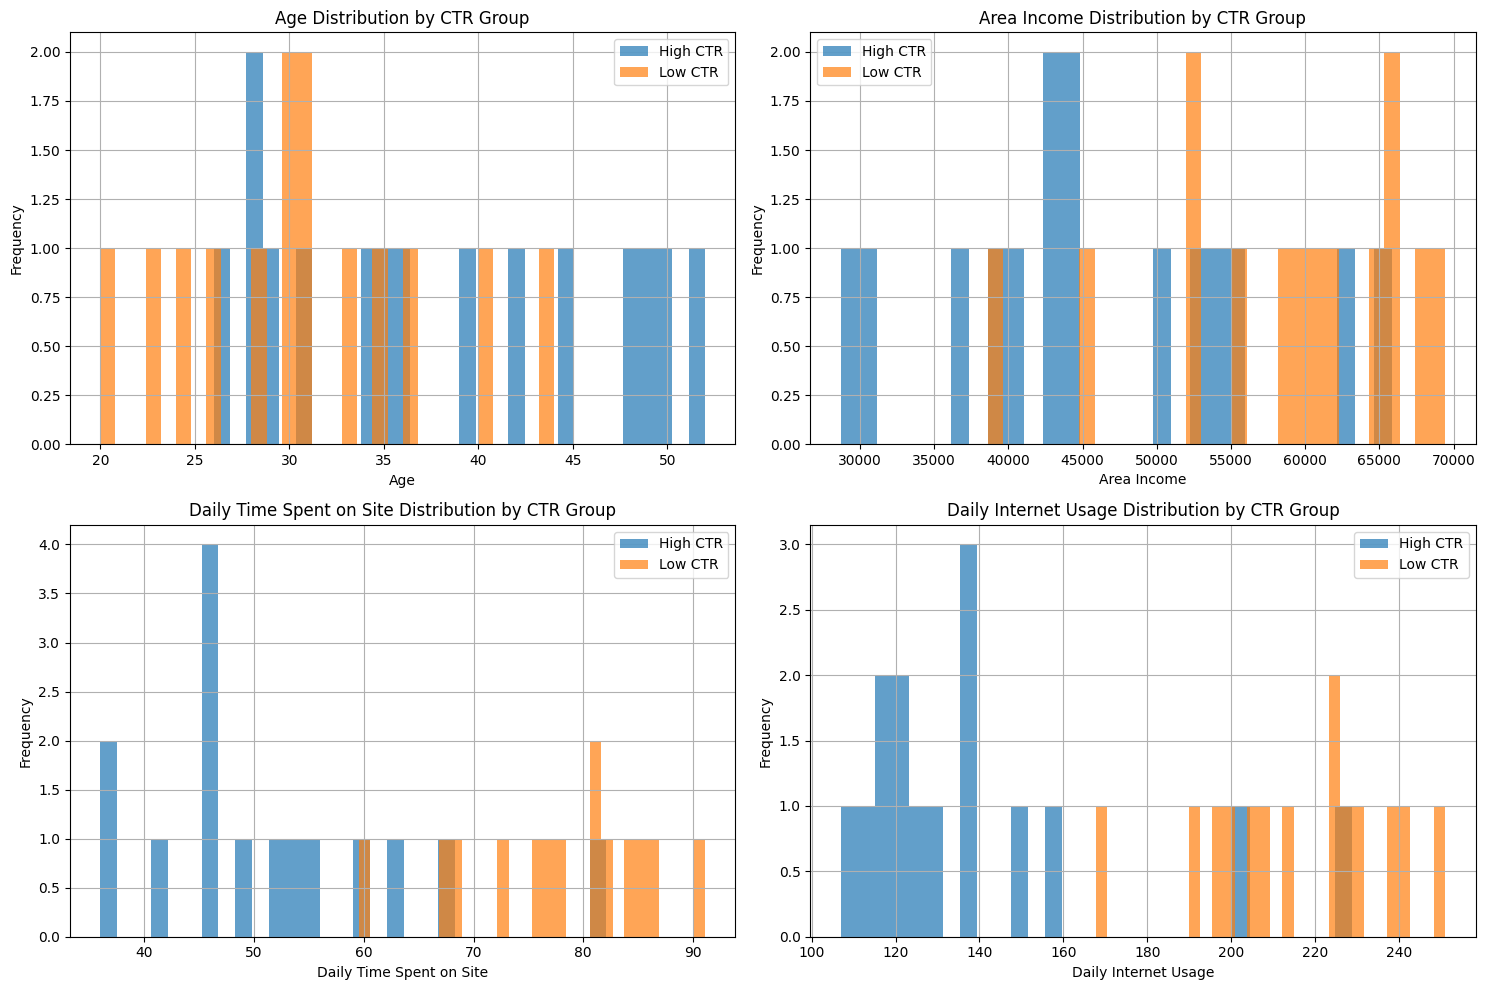

In [12]:
high_ctr_countries = ctr_by_country.nlargest(5).index.tolist()
low_ctr_countries = ctr_by_country.nsmallest(5).index.tolist()

print("Countries with highest CTR:")
display(high_ctr_countries)
print("\nCountries with lowest CTR:")
display(low_ctr_countries)

#seperate data frames
df_high_ctr = df[df['Country'].isin(high_ctr_countries)]
df_low_ctr = df[df['Country'].isin(low_ctr_countries)]

display(df_high_ctr.head())
display(df_low_ctr.head())


display(df_high_ctr.describe())
display(df_low_ctr.describe())

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df_high_ctr['Age'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Age'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 2)
df_high_ctr['Area Income'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Area Income'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Area Income')
plt.ylabel('Frequency')
plt.title('Area Income Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 3)
df_high_ctr['Daily Time Spent on Site'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Daily Time Spent on Site'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frequency')
plt.title('Daily Time Spent on Site Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 4)
df_high_ctr['Daily Internet Usage'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Daily Internet Usage'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Frequency')
plt.title('Daily Internet Usage Distribution by CTR Group')
plt.legend()

plt.tight_layout()
plt.show()

## compare the key characteristics (Age, Area Income, Daily Time Spent on Site, Daily Internet Usage) between the high and low CTR country groups

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,52.198667,38.133333,46154.509333,139.988667,0.666667,1.0
std,12.162442,8.983053,10553.829262,33.876977,0.487950,0.0
min,35.980000,26.000000,28679.930000,106.860000,0.000000,1.0
25%,46.210000,30.000000,40325.450000,119.125000,0.000000,1.0
50%,49.350000,36.000000,44275.130000,128.620000,1.000000,1.0
75%,57.465000,46.500000,53482.100000,144.380000,1.000000,1.0
max,82.120000,52.000000,65856.740000,228.780000,1.000000,1.0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,14.00000,14.000000,14.000000,14.000000,14.000000,14.0
mean,77.87000,30.785714,58562.996429,215.904286,0.571429,0.0
std,8.45823,6.588785,8817.207757,22.682743,0.513553,0.0
min,59.52000,20.000000,38609.200000,167.670000,0.000000,0.0
25%,73.18750,26.500000,53393.765000,201.845000,0.000000,0.0
50%,79.44500,30.500000,60409.285000,219.485000,1.000000,0.0
75%,83.88000,34.500000,65576.810000,228.340000,1.000000,0.0
max,91.10000,44.000000,69438.040000,251.080000,1.000000,0.0


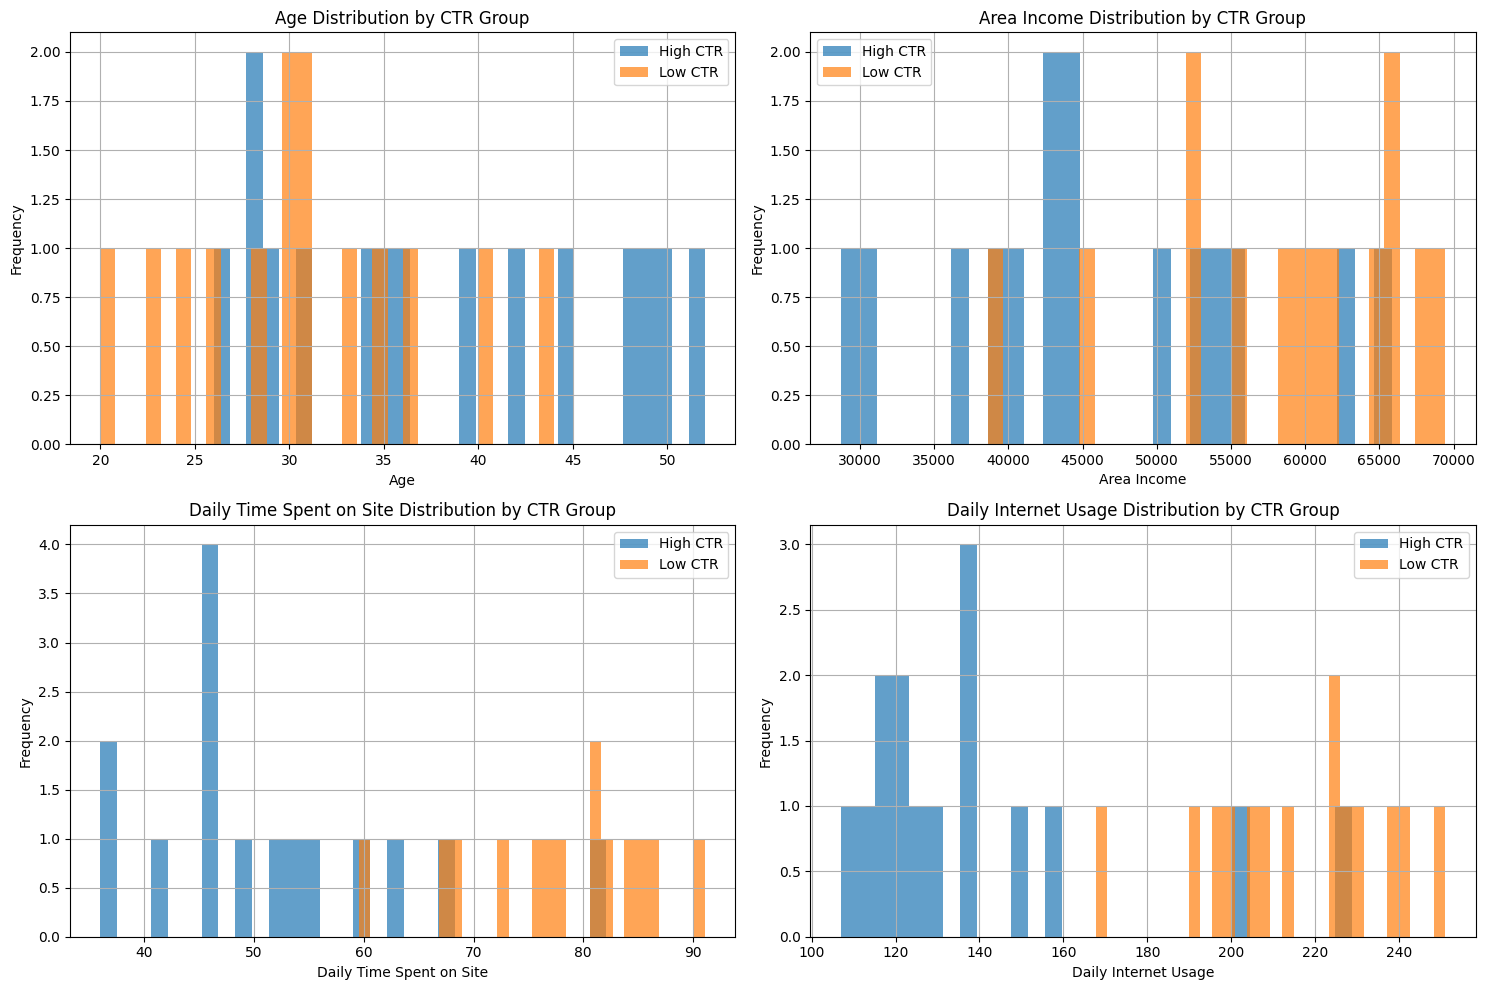

In [13]:
display(df_high_ctr.describe())
display(df_low_ctr.describe())

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df_high_ctr['Age'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Age'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 2)
df_high_ctr['Area Income'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Area Income'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Area Income')
plt.ylabel('Frequency')
plt.title('Area Income Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 3)
df_high_ctr['Daily Time Spent on Site'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Daily Time Spent on Site'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frequency')
plt.title('Daily Time Spent on Site Distribution by CTR Group')
plt.legend()

plt.subplot(2, 2, 4)
df_high_ctr['Daily Internet Usage'].hist(bins=30, alpha=0.7, label='High CTR')
df_low_ctr['Daily Internet Usage'].hist(bins=30, alpha=0.7, label='Low CTR')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Frequency')
plt.title('Daily Internet Usage Distribution by CTR Group')
plt.legend()

plt.tight_layout()
plt.show()

##Split the data into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split

feature_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
X = df[feature_cols]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#PREDICTION!

In [17]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
display(predictions[:5])

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 0])

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#Data analysis and Results

A) The logistic regression model achieved an overall accuracy of 93%.

B) For predicting ad clicks (class 1), the model showed a precision of 0.94 and a recall of 0.90.

C) For predicting no ad clicks (class 0), the model had a precision of 0.91 and a recall of 0.95.

---



#************************END*****************